# Regression

This notebook cotnains code snippet deomonstrating some elementary concepts in Regression, Logistic regression and the LASSO. 


In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,9

## Importing the data

The data used in this exercise contains 44 observations and 14 variables. The variables are

    1. M: Murder rate per 1000,000
    2. AGE: fraction of the region population aged 15-24
    3. NW: fraction of the state population non-white
    4. URB: fraction urban
    5. SOUTH: dummy variable (=1 for Southern regions)
    6: W: median family income in the year of data collection
    7: X: fraction of families with income less than one-half of the median income
    8: U: region unemployment rate
    9: LF: labour force participation rate
    10: PC: probability of conviction 
    11: PX: probability of execution conditional of conviction 
    12: T: length of sentence 
    13: XPOS: dummy variable (=1 if PX is positive)
    14: POP: region population 

In [3]:
data = pd.read_csv('mur.csv', header=0, index_col=0)
data

AGE     LF        M        NW        PC     POP        PX  SOUTH  \
State                                                                          
1      0.165999  0.512  19.2523  0.320782  0.203578   8.670  0.035000      1   
2      0.154263  0.485   7.5286  0.224143  0.326934   3.720  0.080851      1   
3      0.152304  0.508   5.6567  0.126838  0.400922   2.120  0.011765      0   
4      0.132523  0.544   3.2094  0.063389  0.317876  66.100  0.070370      0   
5      0.150324  0.524   2.8048  0.021460  0.349780   6.420  0.061538      0   
6      0.132526  0.567   1.4085  0.027376  0.282964   9.940  0.100000      0   
7      0.138485  0.546   6.1778  0.138979  0.203556   1.290  0.050000      1   
8      0.142542  0.527  12.1511  0.218400  0.231630  12.200  0.053846      1   
9      0.142673  0.523   1.3423  0.008213  0.198968  10.400  0.085714      0   
10     0.146452  0.530   3.7062  0.012303  0.137514   1.890  0.000000      0   
11     0.135641  0.554   5.3496  0.076458  0.141610  57.900  0.018182      0   
12     0.144627  0.535   4.7234  0.298842  0.118388  19.300  0.045455      0   
13     0.145649  0.516   3.8090  0.040066  0.206691   7.880  0.040000      0   
14     0.160966  0.485  10.4411  0.068838  0.188635   7.570  0.044828      1   
15     0.157557  0.493   9.5804  0.330474  0.124469  11.100  0.125000      1   
16     0.140735  0.539   1.0156  0.016845  0.209925  31.500  0.060000      0   
17     0.146347  0.557   7.5220  0.165611  0.226962  11.300  0.055000      1   
18     0.150017  0.512   1.3094  0.003204  0.167158   3.050  0.000000      0   
19     0.141215  0.540   1.6721  0.009652  0.120316  14.400  0.000000      0   
20     0.139801  0.522   7.0718  0.075622  0.139453  18.900  0.041026      0   
21     0.166747  0.511  11.7936  0.454484  0.272403   3.990  0.062857      1   
22     0.139345  0.540   2.7072  0.032124  0.124998   1.480  0.000000      0   
23     0.177759  0.550  13.2054  0.265590  0.234902  10.200  0.085714      1   
24     0.147975  0.529   3.4836  0.018244  0.108282   5.170  0.040000      0   
25     0.136333  0.537   0.8070  0.037898  0.671923   2.480  0.000000      0   
26     0.135722  0.558   2.3161  0.066954  0.357172  26.800  0.030000      0   
27     0.168465  0.504   3.4709  0.074834  0.592128   2.020  0.028571      0   
28     0.127784  0.588   8.3135  0.063561  0.225419   0.601  0.400000      0   
29     0.134108  0.545   1.5683  0.064604  0.266575  37.600  0.125806      0   
30     0.138551  0.535   4.1335  0.065236  0.164398  48.600  0.122222      0   
31     0.154608  0.488   3.8393  0.089921  0.128286   7.810  0.090909      1   
32     0.132651  0.545   1.8328  0.015916  0.286917   6.550  0.075000      0   
33     0.145805  0.521   3.5360  0.061361  0.210125  54.000  0.069231      0   
34     0.152406  0.560   1.1084  0.018792  0.341794   5.410  0.000000      0   
35     0.175382  0.562   8.8992  0.389047  0.132698   4.050  0.216000      1   
36     0.154947  0.533   1.2739  0.037130  0.240531   1.570  0.100000      0   
37     0.162758  0.509  15.2657  0.161454  0.167163   9.760  0.038095      1   
38     0.160103  0.532  11.1535  0.127692  0.252306  34.200  0.039631      1   
39     0.163862  0.517   1.7368  0.017352  0.417907   3.450  0.000000      0   
40     0.168072  0.543  11.9782  0.222114  0.281749  10.400  0.032143      1   
41     0.140109  0.537   3.0412  0.026258  0.193504  11.200  0.085714      0   
42     0.140883  0.547   0.8477  0.012195  0.377809  17.700  0.000000      0   
43     0.162544  0.470   2.8339  0.057475  0.756579   4.590  0.032558      1   
44     0.160476  0.569   2.8915  0.022442  0.357114   1.040  0.000000      0   

         T      U   URB     W         X  XPOS  
State                                          
1       47  0.042  40.1  1102  0.324932     1  
2       58  0.047  32.3   920  0.317400     1  
3       82  0.076  36.5  1716  0.302128     1  
4      100  0.079  67.1  2184  0.297032     1  
5      222  0.042  57.4  1748  0.302152    

**Questions** 

1. Does capital punishment have deterrent effects on murder rate?
2. Does murder rate determine whether the regions' decision on capital punishment? 

## Summary Statistics

In [18]:
data.describe()

AGE         LF          M         NW         PC        POP  \
count  44.000000  44.000000  44.000000  44.000000  44.000000  44.000000   
mean    0.149274   0.530659   5.403848   0.105686   0.260455  14.007295   
std     0.012628   0.024801   4.464165   0.113994   0.141659  16.325615   
min     0.127784   0.470000   0.807000   0.003204   0.108282   0.601000   
25%     0.139687   0.515000   1.808800   0.022197   0.166468   3.652500   
50%     0.146400   0.534000   3.621100   0.064083   0.226191   8.275000   
75%     0.160196   0.545250   7.724825   0.144598   0.320141  15.225000   
max     0.177759   0.588000  19.252300   0.454484   0.756579  66.100000   

              PX      SOUTH           T          U        URB            W  \
count  44.000000  44.000000   44.000000  44.000000  44.000000    44.000000   
mean    0.060296   0.340909  136.431818   0.046750  51.715909  1779.522727   
std     0.068631   0.479495   61.666921   0.015798  15.275683   395.357800   
min     0.000000   0.000000   34.000000   0.018000  27.600000   758.000000   
25%     0.025974   0.000000   92.500000   0.035000  40.250000  1548.250000   
50%     0.045142   0.000000  124.000000   0.044500  50.300000  1827.500000   
75%     0.082067   1.000000  179.000000   0.054250  58.000000  2065.250000   
max     0.400000   1.000000  298.000000   0.088000  88.400000  2389.000000   

               X       XPOS  
count  44.000000  44.000000  
mean    0.289040   0.795455  
std     0.024968   0.408032  
min     0.209235   0.000000  
25%     0.280129   1.000000  
50%     0.295500   1.000000  
75%     0.302374   1.000000  
max     0.324932   1.000000

Take a look at the boxplot

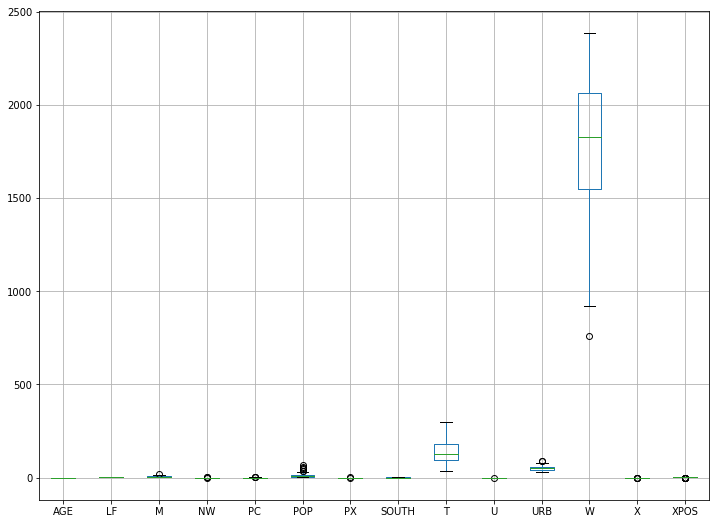

In [19]:
data.boxplot()

Oops, can't see much when one have too many variables

Let's just focus on the one variable of interets. 

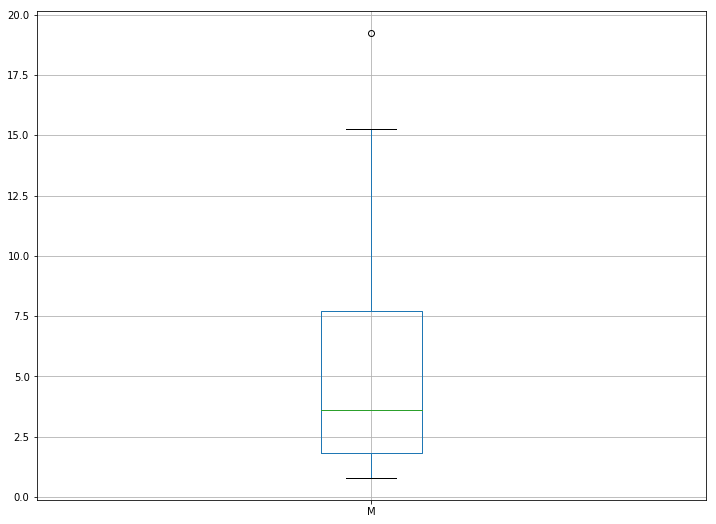

In [20]:
data.boxplot(['M'])

What about histogram? 

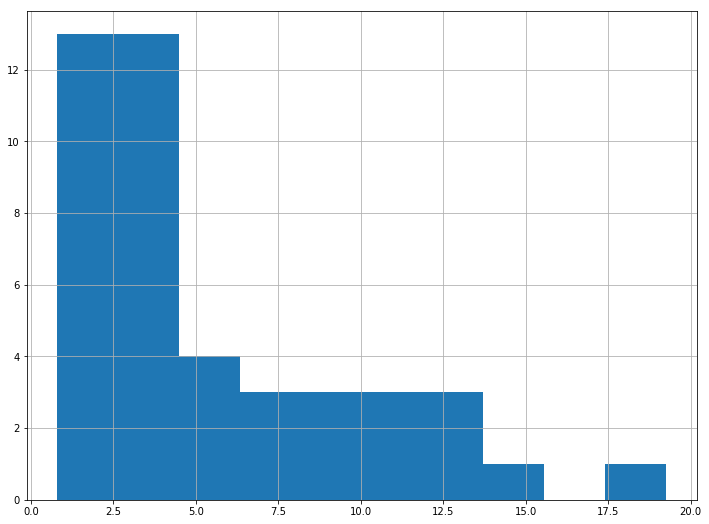

In [7]:
data['M'].hist()

Outliers should be pretty obvious. 

So to develop a regression, we can first include all variables as we have no idea what should or shouldn't be included. There are issues about over and under misspecification but we will skip that for now. 

In [8]:
model_everything = 'M~AGE+LF+NW+PC+PX+SOUTH+T+U+URB+W+X+XPOS'
model_mur = smf.ols(model_everything,data=data).fit()
model_mur.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      M   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     9.036
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           4.18e-07
Time:                        16:43:36   Log-Likelihood:                -94.676
No. Observations:                  44   AIC:                             215.4
Df Residuals:                      31   BIC:                             238.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0106     17.619     -1.022      0.315     -53.944      17.923
AGE           14.6036     49.164      0.297      0.768     -85.667     114.875
LF            40.1054     23.506      1.706      0.098      -7.835      88.046
NW             6.5910      5.875      1.122      0.271      -5.392      18.574
PC            -4.4289      3.154     -1.404      0.170     -10.862       2.005
PX            -4.1965      7.444     -0.564      0.577     -19.378      10.985
SOUTH          2.9616      1.527      1.940      0.062      -0.152       6.075
T             -0.0151      0.008     -1.874      0.070      -0.032       0.001
U             13.3902     29.707      0.451      0.655     -47.198      73.978
URB            0.0125      0.047      0.266      0.792      -0.083       0.108
W             -0.0035      0.002     -1.550      0.131      -0.008       0.001
X             15.1307     25.759      0.587      0.561     -37.405      67.666
XPOS           2.8282      1.348      2.098      0.044       0.079       5.577
==============================================================================
Omnibus:                        5.037   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.098
Skew:                           0.478   Prob(JB):                        0.129
Kurtosis:                       4.150   Cond. No.                     2.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## LASSO 

How about if we use LASSO to determine the model? This will help us to determine the "real" important variables, may be... 

In [9]:
import sklearn.linear_model as skL

In [10]:
clf = skL.Lasso(alpha=0.1)
var_list = ['AGE','LF','NW', 'PC','PX','SOUTH','T','U','URB','W', 'X','XPOS']
X = data.loc[:, var_list].values
M = data.loc[:,'M'].values
clf.fit(X,M)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
lasso_coef = pd.DataFrame(clf.coef_, index=var_list, columns=['Coefficients'])
lasso_coef

Coefficients
AGE        0.000000
LF         0.000000
NW         0.000000
PC        -0.500489
PX         0.000000
SOUTH      2.397852
T         -0.020469
U         -0.000000
URB        0.011051
W         -0.004359
X         -0.000000
XPOS       2.239644

The result tells us that six variables out of twelves should be included. So let's run this again with the new model

In [12]:
model_smaller = 'M~PC+PX+SOUTH+T+URB+W+XPOS'
model_mur = smf.ols(model_smaller,data=data).fit()
model_mur.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      M   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     13.62
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.88e-08
Time:                        16:43:36   Log-Likelihood:                -99.282
No. Observations:                  44   AIC:                             214.6
Df Residuals:                      36   BIC:                             228.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2475      3.121      3.924      0.000       5.917      18.578
PC            -5.2782      2.842     -1.857      0.072     -11.043       0.486
PX             3.5208      6.582      0.535      0.596      -9.828      16.870
SOUTH          3.2954      1.369      2.407      0.021       0.519       6.072
T             -0.0189      0.007     -2.553      0.015      -0.034      -0.004
URB            0.0106      0.035      0.302      0.764      -0.061       0.082
W             -0.0036      0.002     -2.138      0.039      -0.007      -0.000
XPOS           2.0486      1.178      1.740      0.090      -0.340       4.437
==============================================================================
Omnibus:                        5.031   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.905
Skew:                           0.327   Prob(JB):                       0.0861
Kurtosis:                       4.499   Cond. No.                     3.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Classification 

A simple demonstrate in the binary case using logistic regression. 

Let's say now we want to see if regions' decision on capital punishment is related to murder rate. In other words, we are trying to model the binary variable **XPOS**. Specifically, 

$$ P(XPOS=1 | \mathbf{X}). $$



In [13]:
logit_everything = 'XPOS~AGE+LF+NW+T+U+URB+W+X+M'
logit_mur = smf.logit(logit_everything,data=data).fit()
logit_mur.summary()

Optimization terminated successfully.
         Current function value: 0.125072
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   XPOS   No. Observations:                   44
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                            9
Date:                Wed, 19 Sep 2018   Pseudo R-squ.:                  0.7531
Time:                        16:43:36   Log-Likelihood:                -5.5032
converged:                       True   LL-Null:                       -22.292
                                        LLR p-value:                 0.0001059
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.7409     84.773      0.504      0.614    -123.411     208.893
AGE         -199.6485    181.685     -1.099      0.272    -555.744     156.447
LF          -137.6714    126.468     -1.089      0.276    -385.544     110.201
NW           124.3515    123.732      1.005      0.315    -118.158     366.861
T              0.0390      0.032      1.232      0.218      -0.023       0.101
U           -108.1898    132.494     -0.817      0.414    -367.873     151.494
URB            0.0327      0.184      0.177      0.859      -0.329       0.394
W              0.0220      0.018      1.203      0.229      -0.014       0.058
X             27.7929    111.833      0.249      0.804    -191.396     246.982
M              2.2975      2.077      1.106      0.269      -1.774       6.369
==============================================================================

Possibly complete quasi-separation: A fraction 0.59 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

How about applying the LASSO concept in logistic regression? 

In [14]:
var_list = ['AGE','LF','NW','T','U','URB','W','X','M']
X = data.loc[:,var_list].values
xpos = data.loc[:, 'XPOS']
logit_lasso_model = skL.LogisticRegression(penalty='l1', solver='liblinear')
logit_lasso = logit_lasso_model.fit(X,xpos)

In [15]:
logit_lasso_result = pd.DataFrame(logit_lasso.coef_.transpose(), index=var_list, columns=['Coefficients'])

In [16]:
logit_lasso_result

Coefficients
AGE      0.000000
LF       0.000000
NW       0.000000
T        0.006551
U        0.000000
URB      0.016862
W       -0.001492
X        0.000000
M        0.763685

Interestingly, only four variables survived. Murder rate is one of them. 

In [17]:
logit_smaller = 'XPOS~T+URB+W+M'
logit_mur = smf.logit(logit_smaller,data=data).fit()
logit_mur.summary()

Optimization terminated successfully.
         Current function value: 0.249942
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   XPOS   No. Observations:                   44
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Sep 2018   Pseudo R-squ.:                  0.5067
Time:                        16:43:36   Log-Likelihood:                -10.997
converged:                       True   LL-Null:                       -22.292
                                        LLR p-value:                 0.0001529
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.9386      8.281     -2.166      0.030     -34.170      -1.707
T              0.0252      0.011      2.193      0.028       0.003       0.048
URB            0.0127      0.039      0.323      0.747      -0.064       0.090
W              0.0051      0.003      1.558      0.119      -0.001       0.011
M              1.9925      0.820      2.431      0.015       0.386       3.599
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""